The cell below is necessary for equation labels:

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

# Models of population growth

Let's say you're interested in modeling population growth. One popular model is that the growth is proportional to the size of the population. This is a reasonable assumption for animals/baceteria/viruses under ideal conditions. There are two variables to begin with:

* $ t $, the time point (independent variable)
* $P $, the population size (dependent variable)

We want to know the change in $P$ over $t$, so we model this as:
\begin{align}
    \frac{dP}{dt} = kP \label{eq1}
\end{align}

where $k$ is the proportionality constant.

What are the consequences of this model? We may assume that the population cannot be $0$, so $P(t) > 0$ for all $t$. If $k > 0 $, then by equation (\ref{eq1}) we have $P'(t) > 0$ for all $t$. In other words, the population is always increasing, and as the population $P$ grows larger, the derivative $\frac{dP}{dt}$ grows larger; the growth rate increases with the population size.

This function is a constant multiple of itself. The unique family to this solution is $P(t) = Ce^{kt}$, for varying $C$. Then:

$$ P'(t) = C(ke^{kt}) = k(Ce^{kt}) = kP(t) $$

Since populations can only be positive, we only care about $C > 0$. Generally we also only care about $t \ge 0$ as well.

Plugging in the value $t=0$ we see that 

$$P(0) = Ce^{k(0)} = C$$

Meaning that our initial population is $C$.

The summary of variables so far is:
* $t$ (time)
* $P(t)$ (population at time $t$)
* $k$, some proportionality constant
* $C$, the starting population

This model is not fully realistic as even under ideal conditions populations will hit a **carrying capacity ($K$)** related to resources, habitats, space, etc. Usually what happens is the population levels off as it approaches $K$, and if the population exceeds its capacity, it shrinks. Thus we formulate two assumptions:

* $\frac{dP}{dt} \approx kP$ when $P$ is small (growth starts out proportional to P)
* $\frac{dP}{dt} < 0$ if $P > K$

We can summarize these in one expression:
\begin{align}
    \frac{dP}{dt} = kP(1 - \frac{P}{K}) \label{eq2}
\end{align}

This is called the **logistic differential equation**. Notice that:

* if $P$ is small relative to $K$, then $\frac{P}{K} \approx 0$ and $\frac{dP}{dt} \approx kP$
* there are two solutions to equation (\ref{eq2}): $P(t) = 0$ and $P(t) = K$
 * these are **equilibrium solutions**
 * an equilibrium point is stable if a small perturbation of the solution from the equilibrium point decays in time
 * an equilibrium point is unstable if it grows in time

**Questions:** 
* When is the right side of equation (\ref{eq2}) negative? When is it positive? Consider the implications of such a model.
* What's happening to our growth rate when we're at the equilibrium solutions? What are the interpretations?
* How could you modify the equation to include a constant harvest rate, $c$?
* Some species require a minimum population $m$. For example, having too few mates nearby can lead to extinction even though there may be many individuals over a large area. How could you include a minimum population $m$?
 * Hint: Set up a term similar to $(1 - \frac{P}{K})$ that becomes negative when $P < m$

## The law of natural growth/decay

One differential equation, known as the law of natural growth/decay, is extremely common across fields. It follows the form

$$\frac{dy}{dt} = ky$$
$$ y(0) = y_0$$

and has the solution

$$y(t) = y_{0}e^{kt}$$

Recall the form of equation (\ref{eq1}): $\frac{dP}{dt} = kP \Leftrightarrow \frac{1}{P}\frac{dP}{dt}=k$. Then $k$ is the growth rate divided by population size; it is the **relative growth rate**. If $t$ is measured in years, and the relative growth rate is $k=0.05$, the population grows at a relative rate of $5\%$ per year. Mathematically, if the population at time $0$ is $P_0$: 
$P(t) = P_{0}e^{0.05t}$

## Predator-prey systems

Typically species do not live in isolation. One common model involves one species, the *prey*, which has a large food supply, and the *predator*, which eats the prey. For this example we will consider rabbits and wolves. The rabbit population will be modeled through $R(t)$, and the wolf population by $W(t)$. We assume:
* if there are no wolves, the rabbit population grows exponentially as $\frac{dR}{dt}=kR$, for some constant $k>0$
* if there are no rabbits, the wolf population declines proportionally as $\frac{dW}{dt}=-rW$, for some constant $r>0$
* The main cause of death for prey is predation
* The birth and survival rates of predators depend on the available food supply (prey)
* The species interact in proportion to their population sizes

One system that incorporates these assumptions is:
\begin{align}
\frac{dR}{dt} = kR - aRW \label{eqR}\\
\frac{dW}{dt} = -rW + bRW \label{eqW}
\end{align}
Where $k, r, a, b$ are some positive constants.

These equations are known as predator-prey equations, also known as **Lotka-Volterra equations**. The solution is a pair of a functions $R(t)$ and $W(t)$. These must be solved simultaneously and almost never have analytical solutions.

### Example
Consider a population of rabbits and wolves as described above. Suppose $k=0.08$, $r=0.02$, $a=0.001$, $b=0.00002$, with time $t$ measured in months. What are the constant (equilibrium) solutions? What are the interpretations?

Plugging the given values into equations (\ref{eqR}) and (\ref{eqW}), we have:

$$\frac{dR}{dt}=0.08R - 0.001RW \\ \frac{dW}{dt}=-0.02W + 0.00002RW$$

The equations are constant when both derivatives are $0$, i.e. when:

$$R'=R(0.08 - 0.001W)=0 \\ W'=W(-0.02 + 0.00002R)=0$$

# Solving differential equations

We consider **differential equations (DEs)**. These are equations that contain an unknown function one or more of its derivatives. The order of the differential equation is its highest derivative -- we are working with differential equations of degree 1. When our systems have multiple independent variables, we are working with **partial differential equations (PDEs)**. In our case, we are working with one independent variables, which we call **ordinary differential equations (ODEs)**. The independent variable can be anything but for us it's usually time.

A function $f$ is called a **solution** of a differential equation if the equation is satisfied when $y=f(x)$ and its derivatives are substituted into the equation. When we solve a differential equation, we are finding all possible solutions of the equation. Typically we're not interested in finding the general solution, but rather a particular solution that satisfies a condition of the form $y(t_{0}) = y_{0}$ (an *initial condition*). This is an **initial-value problem**. Geometrically we're finding a family of curves that are solutions to the problem and picking one that passes through the point $(t_0, y_0)$. In the real world we measure the state of a system at time $t_0$ (e.g. population size) and use our solution to predict the future behaviour of the system.

However, most differential equations don't have an explicit solution, meaning we must use graphical (direction fields) and numerical (Euler's method) approaches.

## Direction fields for Lotka-Volterra models

This model is not quite similar to what we have above. You'll need to recalculate the Jacobian and sub that in.

In [2]:
from numpy import *
import pylab as p
# Definition of parameters
a = 1 # 
b = 0.1
c = 1.5
d = 0.75

#a = 0.08
#b = 0.001
#c = 0.02
#d = 0.00002

In [3]:
def dX_dt(X, t=0):
    """ Return the growth rate of wolf and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [4]:
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

In [5]:
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])

In [6]:
A_f0 = d2X_dt2(X_f0)

In [7]:
A_f1 = d2X_dt2(X_f1)

In [8]:
lambda1, lambda2 = linalg.eigvals(A_f1)

In [9]:
# Both eigenvalues are 
lambda1, lambda2

(1.224744871391589j, -1.224744871391589j)

In [10]:
# They are imaginary numbers. The wolf and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*pi/abs(lambda1)

### Integrating ODEs

In [11]:
from scipy import integrate
t = linspace(0, 15,  1000)              # time
X0 = array([10, 5])                     # initials conditions: 10 rabbits and 5 wolves
X = integrate.odeint(dX_dt, X0, t)

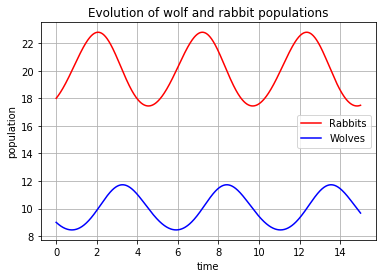

In [16]:
rabbits, wolves = X.T
f1 = p.figure()
p.plot(t, rabbits, 'r-', label='Rabbits')
p.plot(t, wolves  , 'b-', label='Wolves')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('population')
p.title('Evolution of wolf and rabbit populations')

f1

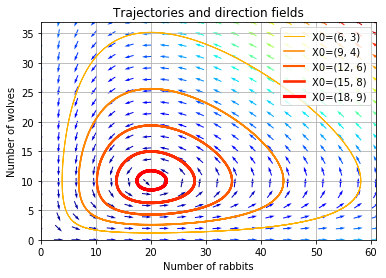

In [15]:
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                       # starting point
    X = integrate.odeint(dX_dt, X0, t) # integrate
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % (X0[0], X0[1]))

# define a grid and compute direction at each point
ymax = p.ylim(bottom=0)[1]                        # get axis limits
xmax = p.xlim(left=0)[1]
nb_points = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet) # map direction fields as arrows 
p.xlabel('Number of rabbits')
p.ylabel('Number of wolves')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)

f2

# References

* Stewart, James. _Calculus: Early Transcendentals Single Variable_, 5th edition, Chapter 9
* Matplotlib: lotka volterra tutorial. https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html